In [ ]:
import pandas as pd
import tensorflow as tf
from google.colab import files
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import os
import subprocess
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
ds_files = files.upload()

Saving arduino_output_bad_7.csv to arduino_output_bad_7.csv
Saving arduino_output_bad_6.csv to arduino_output_bad_6.csv
Saving arduino_output_bad_5.csv to arduino_output_bad_5.csv
Saving arduino_output_bad_4.csv to arduino_output_bad_4.csv
Saving arduino_output_bad_3.csv to arduino_output_bad_3.csv
Saving arduino_output_bad_2.csv to arduino_output_bad_2.csv
Saving arduino_output_bad_1.csv to arduino_output_bad_1.csv
Saving arduino_output_good_7.csv to arduino_output_good_7.csv
Saving arduino_output_good_6.csv to arduino_output_good_6.csv
Saving arduino_output_good_5.csv to arduino_output_good_5.csv
Saving arduino_output_good_4.csv to arduino_output_good_4.csv
Saving arduino_output_good_3.csv to arduino_output_good_3.csv
Saving arduino_output_good_2.csv to arduino_output_good_2.csv
Saving arduino_output_good_1.csv to arduino_output_good_1.csv


In [ ]:
def load_dataset(ds_files, sequence_len=10):
  data = []
  labels = []

  for filename, content in ds_files.items():
      df = pd.read_csv(filename)

      # sequences for input using last
      for i in range(len(df) - sequence_len + 1):
          sequence = df.iloc[i:i+sequence_len].values.flatten()
          data.append(sequence)

          # filenames with good have the good data
          label = 1 if "good" in filename.lower() else 0
          labels.append(label)

  return np.array(data), np.array(labels)

In [ ]:
data, labels = load_dataset(ds_files)
data.shape, labels.shape

((2942, 240), (2942,))

In [ ]:
def preprocessing(data, labels):
  # Normalize the data
  # scaler = StandardScaler()
  # normalized_data = scaler.fit_transform(data)
  # print("Mean:", scaler.mean_)
  # print("Standard Deviation:", np.sqrt(scaler.var_))
  X_train, X_temp, y_train, y_temp = train_test_split(data, labels, test_size=0.2, random_state=42)
  X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
  return X_train, X_val, X_test, y_train, y_val, y_test

In [ ]:
X_train, X_val, X_test, y_train, y_val, y_test = preprocessing(data, labels)
print("x_val", X_val)
print("y_val", y_val)
print("x_train", X_train)
print("y_train", y_train)

x_val [[ 1.1272e+04 -3.1744e+04 -8.0960e+03 ... -2.2000e+00  3.1500e+00
  -1.6000e-01]
 [ 1.3600e+02 -3.2760e+04 -3.5760e+03 ... -6.0000e-02 -4.0000e-02
  -1.0000e-02]
 [-6.9360e+03 -1.7400e+04  1.6000e+01 ...  1.9300e+00 -2.8700e+00
   1.4000e-01]
 ...
 [ 1.5360e+03 -3.2440e+04  5.7440e+03 ...  3.7000e-01 -1.8000e-01
  -9.0000e-01]
 [ 1.4400e+02 -1.5352e+04  6.6800e+03 ...  6.3000e-01 -1.6000e-01
  -2.0200e+00]
 [ 8.1920e+03 -3.2768e+04 -8.1200e+03 ... -1.0000e-02  3.0000e-02
   2.0000e-02]]
y_val [0 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0 0 0 1 1 0 0 1 1 0 0 1 0 0 0
 1 1 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 0 1 1
 0 1 0 0 0 0 1 1 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 1 1 0 1 0 1 0 1 0 1 1 0 0 0
 0 1 0 1 0 0 1 0 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 0
 1 0 0 0 1 0 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1
 0 1 0 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0 0 1 1 0 1 0 0
 0 1 1 0 1 0 0 1 1 0 1 0 1 1 0 1 0 1 1 1 1 0 0

In [ ]:
average_mean = [0]*24
for x in range(0, 24):
  total_mean = mean[x] + mean[x+10] + mean[x+20] + mean[x+30] + mean[x+40] + mean[x+50] + mean[x+60] + mean[x+60] + mean[x+70] + mean[x+80]
  average_mean[x] = total_mean/24
print(average_mean)

average_std_dev = [0]*24
for x in range(0, 24):
  total_std_dev = std_dev[x] + std_dev[x+10] + std_dev[x+20] + std_dev[x+30] + std_dev[x+40] + std_dev[x+50] + std_dev[x+60] + std_dev[x+70] + std_dev[x+80] + std_dev[x+90]
  average_std_dev[x] = total_std_dev/24
print(average_std_dev)

NameError: name 'mean' is not defined

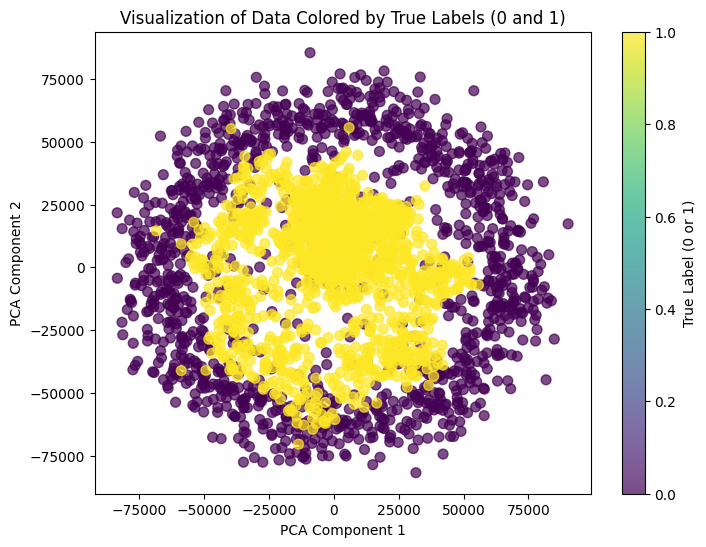

In [ ]:
# Plotting the dataset to visually see if there is enough separation between
# good and bad datapoints.
data, labels = load_dataset(ds_files)

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)

# plotting the data, 0 are datapoints classified as bad, 1 is good.
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)
plt.title("Visualization of Data Colored by True Labels (0 and 1)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="True Label (0 or 1)")
plt.show()



In [1]:
# Attempting k means clustering on the dataset

data, labels = load_dataset(ds_files)

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)


kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(data_pca)
cluster_labels = kmeans.labels_

#Plotting to see if there was any success with this technique.
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=cluster_labels, cmap='viridis', s=50, alpha=0.7)
plt.title("Visualization of Data with KMeans Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster Label")
plt.show()


NameError: name 'load_dataset' is not defined

Mean: [3.58063303e-13 9.75341871e-13]
Standard Deviation: [34519.34282805 32955.41651149]


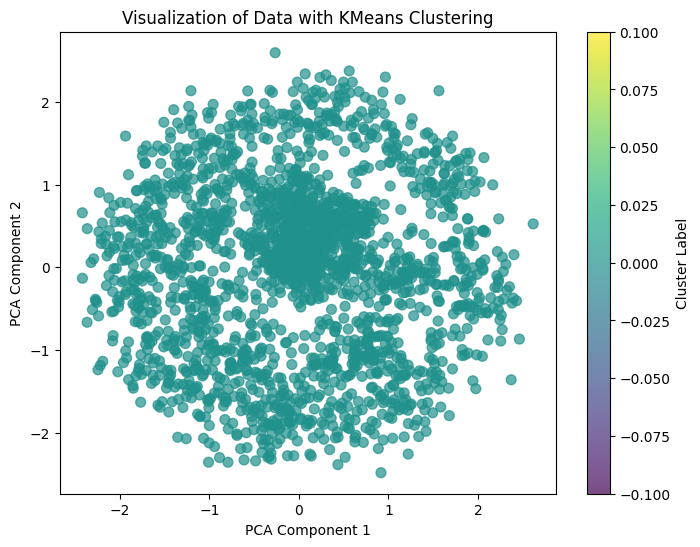

In [ ]:
# More K-Means visualization
data, labels = load_dataset(ds_files)

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)

X_train, X_val, X_test, y_train, y_val, y_test, mean, std = preprocessing(data_pca, labels)


kmeans = KMeans(n_clusters=1, random_state=42)
kmeans.fit(X_train)
cluster_labels = kmeans.labels_

plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=cluster_labels, cmap='viridis', s=50, alpha=0.7)
plt.title("Visualization of Data with KMeans Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster Label")
plt.show()

In [ ]:
# # distances of each of the 300 training samples from each of the 3 centroids
# train_distances = kmeans.transform(X_train) # generating the matrix
# print("train_distance shape:", train_distances.shape)
# print()

# num_centers = 1

# # distances of the 300 points from its closest centroid
# center_distances = {key: [] for key in range(num_centers)}      # {0: [distances...], 1: [distances...], 2: [distances...]} reorganizing (dictionary
# # comprehension without having to use a for loop)

# for i in range(len(cluster_labels)):  # 300
#   cluster_number = cluster_labels[i]
#   min_distance = train_distances[i][cluster_number] # calculate min distance
#   #print(min_distance)

#   # min_distance2 = np.min(train_distances[i])
#   # print(min_distance2)

#   center_distances[cluster_number].append(min_distance)

# #finding the cluster closes the center point

# print("No. data samples close to centroid 1 (Cluster 1):", len(center_distances[0]))


train_distance shape: (2353, 1)

No. data samples close to centroid 1 (Cluster 1): 2353


In [ ]:
# percentile_threshold = 40


# # out of 100 data samples, it finds the 2nd max (or max among 99 samples) distance.
# center_99percentile_distance = dict()
# for key in center_distances.keys():      # 3
#     center_99percentile_distance[key] = np.percentile(center_distances[key], percentile_threshold)

#     # print(center_distances[key])
#     # print(np.max(center_distances[key]))
#     # print()

# print()
# print("50 Percentile distance for each centroid:",center_99percentile_distance)


50 Percentile distance for each centroid: {0: 1.0363173945993678}


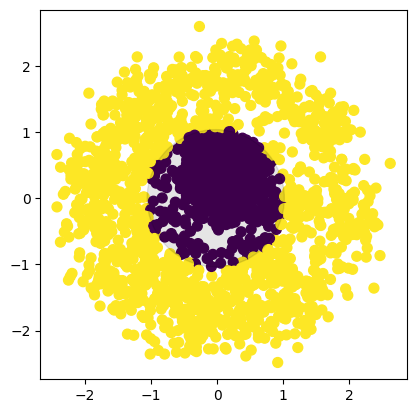

In [ ]:
# fig, ax = plt.subplots()

# colors = []
# for i in range(len(X_train)):
#   min_distance = train_distances[i][cluster_labels[i]]
#   cluster_num = cluster_labels[i]
#   if (min_distance > center_99percentile_distance[cluster_num]):
#     colors.append(3)
#   else:
#     colors.append(cluster_num)


# ax.scatter(X_train[:, 0], X_train[:, 1], c=colors, s=50, cmap='viridis')

# # draw circles
# centers = kmeans.cluster_centers_
# for i in range(len(centers)):
#   circle = plt.Circle((centers[i][0], centers[i][1]), center_99percentile_distance[i], color='black', alpha=0.1);
#   ax.add_artist(circle)

#   ax.set_aspect(1.0)

In [ ]:
'''
This is the model we train for our application.
It uses a decoder-like architecture and has a
two-neuron output layer
'''

def build_model(input_dim):
    model = Sequential([
        # Encoder
        Dense(128, activation='relu', input_dim=input_dim),
        Dense(64, activation='relu'),

        # Latent space
        Dense(32, activation='relu'),

        # Decoder
        Dense(64, activation='relu'),
        Dense(128, activation='relu'),

        # Output layer for two-category classification
        Dense(2, activation='softmax')
    ])

    # Use a compatible optimizer and loss for TFLite Micro
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [ ]:
# X_train, X_val, X_test, y_train, y_val, y_test, mean, std = preprocessing(data_pca, labels)
print(X_train.shape[1])

240


In [ ]:
input_dim = X_train.shape[1]
print
model = build_model(input_dim)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Training the model
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_val, y_val)
)

Epoch 1/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8267 - loss: 135.2950 - val_accuracy: 0.9184 - val_loss: 17.2259
Epoch 2/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9667 - loss: 5.7181 - val_accuracy: 0.9626 - val_loss: 6.6904
Epoch 3/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9737 - loss: 4.9247 - val_accuracy: 0.9490 - val_loss: 14.4234
Epoch 4/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9680 - loss: 8.5472 - val_accuracy: 0.9592 - val_loss: 17.7351
Epoch 5/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9833 - loss: 4.7332 - val_accuracy: 0.9830 - val_loss: 0.5413
Epoch 6/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9870 - loss: 1.0220 - val_accuracy: 0.9830 - val_loss: 1.5891
Epoch 7/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9930 - loss: 0.8172 - val_accuracy: 0.9796 - val_loss: 3.7117
Epoch 8/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9947 - loss: 0.6371 - val_accuracy: 0.9558 - val

In [ ]:
# Test evaluation of the model using loss and accuracy as the metrics
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9947 - loss: 0.0080
Test Loss: 0.009595558978617191, Test Accuracy: 0.993220329284668


In [ ]:
# Saving the model as a .h5 file
model.save("walking_classifier_model.h5")

In [ ]:
# Conversion to tflite and quantization of the model
def convert_to_tflite(model, quantize=False):
    converter = tf.lite.TFLiteConverter.from_keras_model(model)
    if quantize:
        converter.optimizations = [tf.lite.Optimize.DEFAULT]
        converter.target_spec.supported_ops = [
            tf.lite.OpsSet.TFLITE_BUILTINS_INT8,
            tf.lite.OpsSet.TFLITE_BUILTINS
        ]

        # Creating a representative dataset for quantization
        def representative_data_gen():
            for i in range(100):
                yield [X_train[i:i+1].astype(np.float32)]

        converter.representative_dataset = representative_data_gen
        converter.inference_input_type = tf.int8
        converter.inference_output_type = tf.int8

    tflite_model = converter.convert()

    tflite_file = "walking_classifier_model.tflite"
    with open(tflite_file, "wb") as f:
        f.write(tflite_model)
    print(f"TFLite model saved to {tflite_file}")
    return tflite_model


In [ ]:
quantized_tflite_model = convert_to_tflite(model, quantize=True)

Saved artifact at '/tmp/tmp3yxuhzgc'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 240), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 2), dtype=tf.float32, name=None)
Captures:
  138825803604816: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138825803606928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138825803609744: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138825803610448: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138825803611328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138825803610624: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138825803605696: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138825803956288: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138825803960336: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138825803958224: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138825803961216: Tenso

/usr/local/lib/python3.10/dist-packages/tensorflow/lite/python/convert.py:983: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(


In [ ]:
# Load the TFLite model
tflite_model_path = "walking_classifier_model.tflite"
interpreter = tf.lite.Interpreter(model_path=tflite_model_path)
interpreter.allocate_tensors()

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

def preprocess_input(data, mean, std):
    return ((data - mean) / std).astype(np.int8)

# Preprocess your test data (example assumes X_test is your test dataset)
mean, std = X_train.mean(axis=0), X_train.std(axis=0)
X_test_preprocessed = preprocess_input(X_test, mean, std)

correct_predictions = 0
for i, input_data in enumerate(X_test_preprocessed):
    input_data = np.expand_dims(input_data, axis=0)  # Add batch dimension
    interpreter.set_tensor(input_details[0]['index'], input_data)
    interpreter.invoke()
    output_data = interpreter.get_tensor(output_details[0]['index'])

    # Post-process the result (e.g., take the argmax for classification)
    predicted_label = np.argmax(output_data)
    true_label = y_test[i]  # Assuming you have true labels in y_test

    if predicted_label == true_label:
        correct_predictions += 1

accuracy = correct_predictions / len(y_test)
print(f"Quantized Model Accuracy: {accuracy * 100:.2f}%")


Quantized Model Accuracy: 93.90%


In [ ]:
original_model_path = '/content/walking_classifier_model.h5'
tflite_model_path = '/content/walking_classifier_model.tflite'

# Get file sizes in bytes
original_model_size_bytes = os.path.getsize(original_model_path)
tflite_model_size_bytes = os.path.getsize(tflite_model_path)

print(f"Original model size: {original_model_size_bytes} bytes")
print(f"TFLite model size: {tflite_model_size_bytes} bytes")

Original model size: 671080 bytes
TFLite model size: 66984 bytes


In [ ]:
# Conversion of the quantized model to a tflite micro C array
def convert_to_tflite_micro(tflite_model_path):
    with open(tflite_model_path, "rb") as f:
        tflite_model = f.read()

    header_file = "walking_classifier_model.h"
    with open(header_file, "w") as f:
        f.write("#ifndef WALKING_CLASSIFIER_MODEL_H\n")
        f.write("#define WALKING_CLASSIFIER_MODEL_H\n\n")
        f.write("const unsigned char walking_classifier_model[] = {\n")

        bytes_per_line = 12
        for i in range(0, len(tflite_model), bytes_per_line):
            chunk = tflite_model[i:i + bytes_per_line]
            f.write("    " + ", ".join(["0x{:02x}".format(byte) for byte in chunk]) + ",\n")

        # Write the length of the model
        f.write("};\n\n")
        f.write(f"const unsigned int walking_classifier_model_len = {len(tflite_model)};\n")
        f.write("#endif  // WALKING_CLASSIFIER_MODEL_H\n")

    print(f"TFLite Micro model header file saved to {header_file}")


In [ ]:
convert_to_tflite_micro("walking_classifier_model.tflite")

TFLite Micro model header file saved to walking_classifier_model.h


In [ ]:
print(labels)
# sequence_length = 10
# sequences = []
# for i in range(len(labels) - sequence_length):
#     imu_data = normalized_data[i:i+sequence_length, :8]  # First 8 features for IMU1
#     # Concatenate IMU1 and IMU2 features along the last axis
#     sequences.append(imu_data)
# sequences = np.array(sequences)
# labels = labels[sequence_length - 1:]
# display(sequences)
# display(sequences[0])
# display(labels)

[0 0 0 ... 1 1 1]


In [ ]:
# sequences = sequences[:min_length]
# labels = labels[:min_length]
# x_train, x_temp, y_train, y_temp = train_test_split(sequences, labels, test_size=0.4, random_state=42)
# x_val, x_test, y_val, y_test = train_test_split(sequences, labels, test_size=0.5, random_state=42)
# print("x_train shape:", x_train.shape)  # Should be (num_samples, 10, 16)
# print("y_train shape:", y_train.shape)  # Should be (num_samples,)